# Preguntas de Negocio - USUARIOS

Este notebook responde las siguientes preguntas de negocio relacionadas con usuarios:
1. ¿Cuántos usuarios se registran por mes?
2. ¿Cuántos usuarios han realizado más de una orden?
3. ¿Cuántos usuarios registrados no han hecho ninguna compra?
4. ¿Qué usuarios han gastado más en total?
5. ¿Cuántos usuarios han dejado reseñas?


## Configuración Inicial e Importaciones


In [1]:
# Importar bibliotecas necesarias
import sys
import os

# Configurar el path para importar módulos del proyecto
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir) if 'preguntas_negocio' in current_dir else current_dir

# Agregar el directorio raíz al path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Importar DBConnector
try:
    from database.db_connector import DBConnector
except ImportError:
    # Intentar con mayúscula (compatibilidad con notebooks existentes)
    from Database.db_connector import DBConnector

# Importar bibliotecas de análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Bibliotecas importadas correctamente")


✓ Bibliotecas importadas correctamente


In [2]:
# Obtener el Engine de la base de datos usando DBConnector (patrón Singleton)
db = DBConnector.get_instance()
engine = db.get_engine()

print("✓ Conexión a la base de datos establecida")
print(f"✓ Engine obtenido: {type(engine).__name__}")


✓ Conexión a la base de datos establecida
✓ Engine obtenido: Engine


## 1. ¿Cuántos usuarios se registran por mes?


USUARIOS REGISTRADOS POR MES
 mes mes_formato mes_nombre  total_usuarios
None        None       None            1000


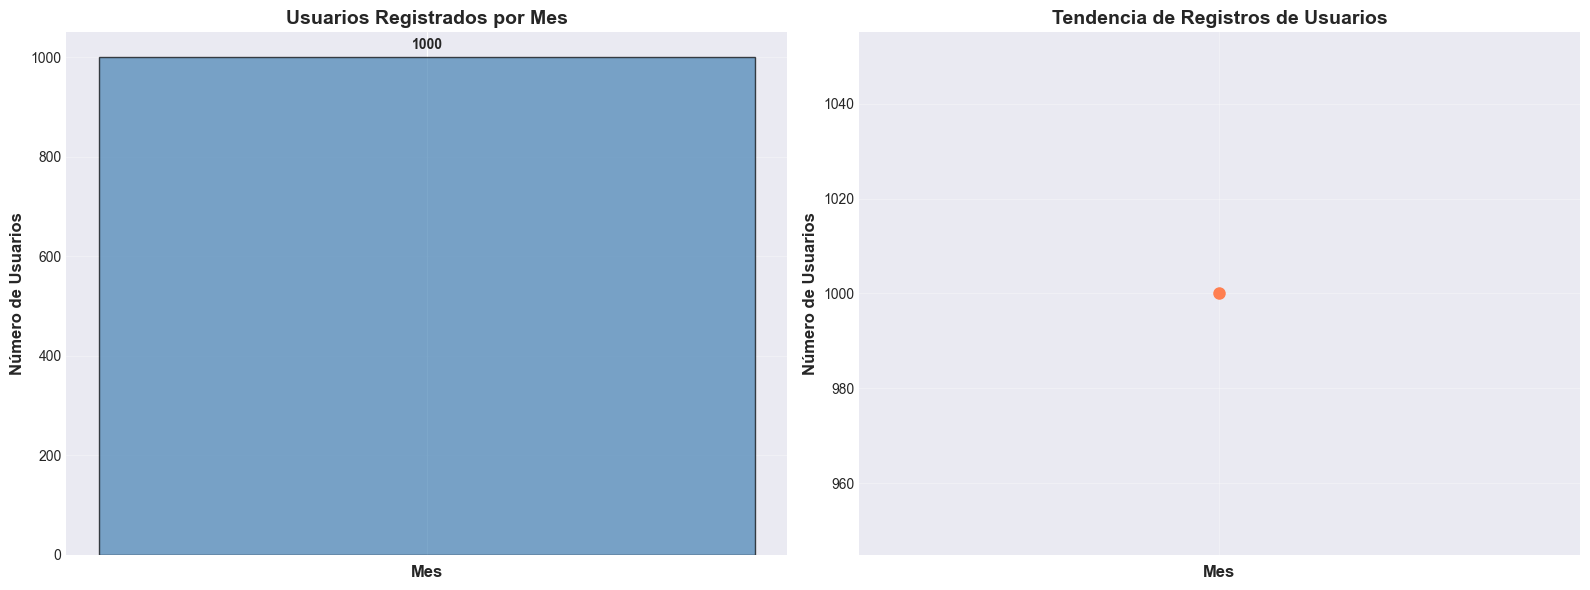


📊 Resumen:
   • Total de meses analizados: 1
   • Total de usuarios registrados: 1,000
   • Promedio de usuarios por mes: 1000.00
   • Mes con más registros: None (1000 usuarios)
   • Mes con menos registros: None (1000 usuarios)


In [4]:
# Consulta SQL para obtener el número de usuarios registrados por mes
query_usuarios_por_mes = """
SELECT 
    DATE_TRUNC('month', fecha_registro) AS mes,
    TO_CHAR(DATE_TRUNC('month', fecha_registro), 'YYYY-MM') AS mes_formato,
    TO_CHAR(DATE_TRUNC('month', fecha_registro), 'Month YYYY') AS mes_nombre,
    COUNT(*) AS total_usuarios
FROM usuarios
GROUP BY DATE_TRUNC('month', fecha_registro)
ORDER BY mes ASC;
"""

df_usuarios_por_mes = pd.read_sql(query_usuarios_por_mes, engine)

print("=" * 100)
print("USUARIOS REGISTRADOS POR MES")
print("=" * 100)
print(df_usuarios_por_mes.to_string(index=False))

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras - Usuarios por mes
ax1.bar(range(len(df_usuarios_por_mes)), df_usuarios_por_mes['total_usuarios'], 
        color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xticks(range(len(df_usuarios_por_mes)))
ax1.set_xticklabels(df_usuarios_por_mes['mes_formato'], rotation=45, ha='right')
ax1.set_xlabel('Mes', fontsize=12, fontweight='bold')
ax1.set_ylabel('Número de Usuarios', fontsize=12, fontweight='bold')
ax1.set_title('Usuarios Registrados por Mes', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(df_usuarios_por_mes['total_usuarios']):
    ax1.text(i, v + max(df_usuarios_por_mes['total_usuarios']) * 0.01, 
             str(int(v)), ha='center', va='bottom', fontweight='bold')

# Gráfico de línea - Tendencia de registros
ax2.plot(range(len(df_usuarios_por_mes)), df_usuarios_por_mes['total_usuarios'], 
         marker='o', linewidth=2, markersize=8, color='coral')
ax2.set_xticks(range(len(df_usuarios_por_mes)))
ax2.set_xticklabels(df_usuarios_por_mes['mes_formato'], rotation=45, ha='right')
ax2.set_xlabel('Mes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Número de Usuarios', fontsize=12, fontweight='bold')
ax2.set_title('Tendencia de Registros de Usuarios', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Resumen:")
print(f"   • Total de meses analizados: {len(df_usuarios_por_mes)}")
print(f"   • Total de usuarios registrados: {df_usuarios_por_mes['total_usuarios'].sum():,}")
print(f"   • Promedio de usuarios por mes: {df_usuarios_por_mes['total_usuarios'].mean():.2f}")
print(f"   • Mes con más registros: {df_usuarios_por_mes.loc[df_usuarios_por_mes['total_usuarios'].idxmax(), 'mes_nombre']} ({int(df_usuarios_por_mes['total_usuarios'].max())} usuarios)")
print(f"   • Mes con menos registros: {df_usuarios_por_mes.loc[df_usuarios_por_mes['total_usuarios'].idxmin(), 'mes_nombre']} ({int(df_usuarios_por_mes['total_usuarios'].min())} usuarios)")


## 2. ¿Cuántos usuarios han realizado más de una orden?


USUARIOS CON MÁS DE UNA ORDEN
Total de usuarios con más de una orden: 999

TOP 10 USUARIOS CON MÁS ÓRDENES
 usuario_id  numero_ordenes  total_gastado       primera_orden        ultima_orden
        940              19       46846.93 2024-07-09 09:10:27 2025-05-27 09:10:27
        540              19       43814.63 2024-07-08 09:10:27 2025-06-29 09:10:27
        710              19       11490.48 2024-07-17 09:10:27 2025-06-30 09:10:27
        770              19       10828.88 2024-06-30 09:10:27 2025-06-07 09:10:27
        843              18       44189.66 2024-07-31 09:10:27 2025-06-14 09:10:27
        411              18       20504.33 2024-07-07 09:10:27 2025-06-22 09:10:27
        329              18       12356.51 2024-07-18 09:10:27 2025-05-09 09:10:27
        878              17       38123.05 2024-07-28 09:10:27 2025-06-11 09:10:27
        759              17       34106.05 2024-08-28 09:10:27 2025-05-21 09:10:27
        913              17       30545.56 2024-07-19 09:10:27 

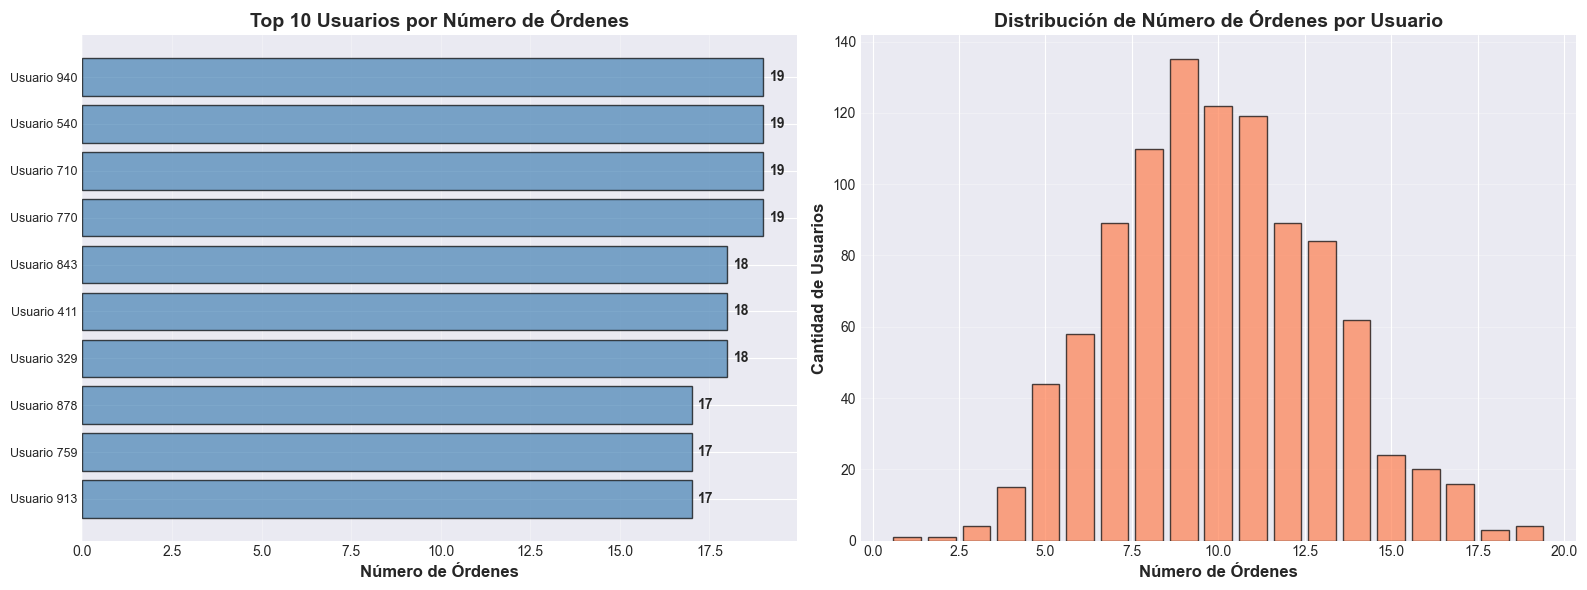


📊 Resumen:
   • Total de usuarios con al menos una orden: 1,000
   • Usuarios con más de una orden: 999
   • Porcentaje de usuarios con múltiples órdenes: 99.90%
   • Usuario con más órdenes: Usuario 940 (19 órdenes)


In [9]:
# Consulta SQL para obtener usuarios con más de una orden
query_usuarios_multiples_ordenes = """
SELECT 
    COUNT(DISTINCT usuario_id) AS total_usuarios_multiples_ordenes
FROM (
    SELECT 
        usuario_id,
        COUNT(*) AS numero_ordenes
    FROM ordenes
    GROUP BY usuario_id
    HAVING COUNT(*) > 1
) AS usuarios_multiples;
"""

# Consulta adicional para obtener estadísticas detalladas
query_detalle_ordenes_por_usuario = """
SELECT 
    usuario_id,
    COUNT(*) AS numero_ordenes,
    SUM(total) AS total_gastado,
    MIN(fecha_orden) AS primera_orden,
    MAX(fecha_orden) AS ultima_orden
FROM ordenes
GROUP BY usuario_id
HAVING COUNT(*) > 1
ORDER BY numero_ordenes DESC, total_gastado DESC
LIMIT 10;
"""

df_usuarios_multiples = pd.read_sql(query_usuarios_multiples_ordenes, engine)
df_detalle_multiples = pd.read_sql(query_detalle_ordenes_por_usuario, engine)

# Consulta para obtener distribución de número de órdenes por usuario
query_distribucion_ordenes = """
SELECT 
    numero_ordenes,
    COUNT(*) AS cantidad_usuarios
FROM (
    SELECT 
        usuario_id,
        COUNT(*) AS numero_ordenes
    FROM ordenes
    GROUP BY usuario_id
) AS ordenes_por_usuario
GROUP BY numero_ordenes
ORDER BY numero_ordenes;
"""

df_distribucion = pd.read_sql(query_distribucion_ordenes, engine)

print("=" * 100)
print("USUARIOS CON MÁS DE UNA ORDEN")
print("=" * 100)
print(f"Total de usuarios con más de una orden: {df_usuarios_multiples['total_usuarios_multiples_ordenes'].iloc[0]:,}")

print("\n" + "=" * 100)
print("TOP 10 USUARIOS CON MÁS ÓRDENES")
print("=" * 100)
print(df_detalle_multiples.to_string(index=False))

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras - Top 10 usuarios por número de órdenes
top_10 = df_detalle_multiples.head(10)
ax1.barh(range(len(top_10)), top_10['numero_ordenes'], color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels([f"Usuario {uid}" for uid in top_10['usuario_id']], fontsize=9)
ax1.set_xlabel('Número de Órdenes', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Usuarios por Número de Órdenes', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Agregar valores en las barras
for i, v in enumerate(top_10['numero_ordenes']):
    ax1.text(v + max(top_10['numero_ordenes']) * 0.01, i, 
             str(int(v)), va='center', fontweight='bold')

# Gráfico de distribución de número de órdenes
ax2.bar(df_distribucion['numero_ordenes'], df_distribucion['cantidad_usuarios'], 
        color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Número de Órdenes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cantidad de Usuarios', fontsize=12, fontweight='bold')
ax2.set_title('Distribución de Número de Órdenes por Usuario', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Consulta para obtener total de usuarios con órdenes
query_total_usuarios_ordenes = """
SELECT 
    COUNT(DISTINCT usuario_id) AS total_usuarios_con_ordenes
FROM ordenes;
"""

df_total_usuarios_ordenes = pd.read_sql(query_total_usuarios_ordenes, engine)
total_usuarios_con_ordenes = df_total_usuarios_ordenes['total_usuarios_con_ordenes'].iloc[0]
usuarios_multiples = df_usuarios_multiples['total_usuarios_multiples_ordenes'].iloc[0]
porcentaje = (usuarios_multiples / total_usuarios_con_ordenes * 100) if total_usuarios_con_ordenes > 0 else 0

print(f"\n📊 Resumen:")
print(f"   • Total de usuarios con al menos una orden: {total_usuarios_con_ordenes:,}")
print(f"   • Usuarios con más de una orden: {usuarios_multiples:,}")
print(f"   • Porcentaje de usuarios con múltiples órdenes: {porcentaje:.2f}%")
print(f"   • Usuario con más órdenes: Usuario {df_detalle_multiples.iloc[0]['usuario_id']} ({int(df_detalle_multiples.iloc[0]['numero_ordenes'])} órdenes)")


## 3. ¿Cuántos usuarios registrados no han hecho ninguna compra?


ESTADÍSTICAS DE USUARIOS SIN COMPRAS
 total_usuarios_registrados  usuarios_con_ordenes  usuarios_sin_ordenes
                       1000                  1000                     0

USUARIOS REGISTRADOS SIN COMPRAS (Total: 0)
No hay usuarios sin compras.


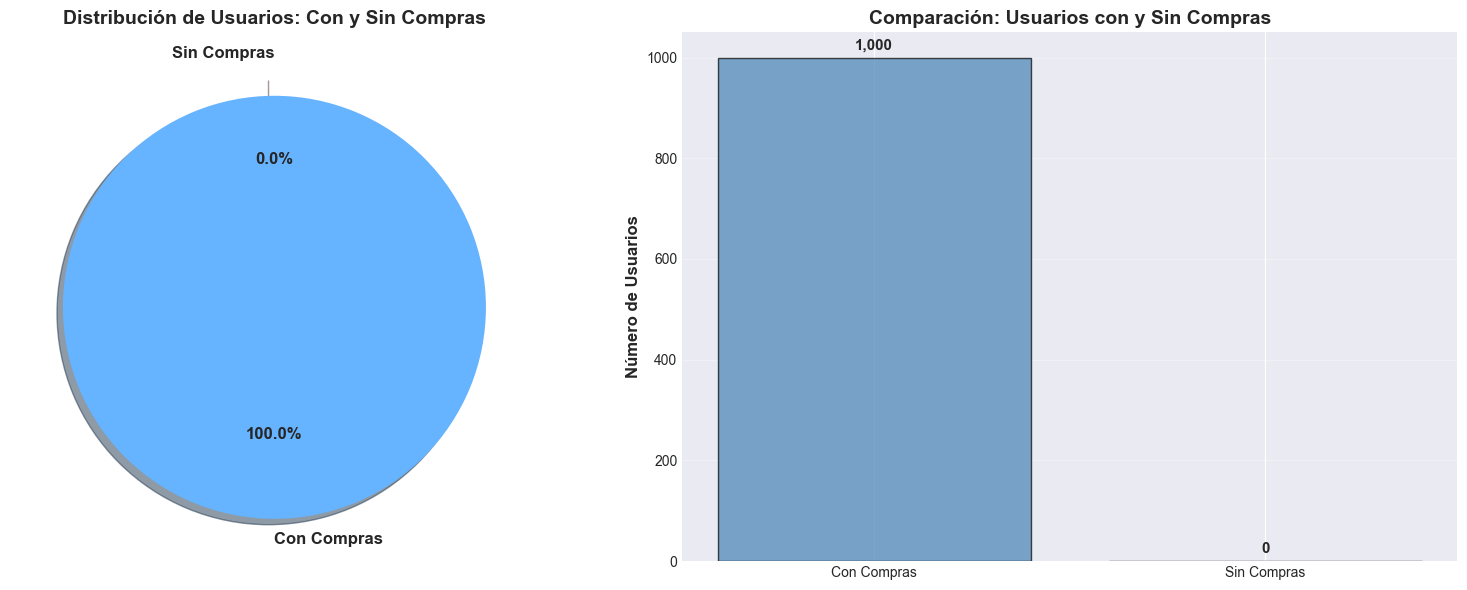


📊 Resumen:
   • Total de usuarios registrados: 1,000
   • Usuarios con al menos una compra: 1,000
   • Usuarios sin compras: 0
   • Porcentaje de usuarios sin compras: 0.00%
   • Tasa de conversión (usuarios que compran): 100.00%


In [6]:
# Consulta SQL para obtener usuarios que no han hecho ninguna compra
query_usuarios_sin_compras = """
SELECT 
    u.usuario_id,
    u.nombre,
    u.apellido,
    u.email,
    u.fecha_registro,
    COALESCE(COUNT(o.orden_id), 0) AS numero_ordenes
FROM usuarios u
LEFT JOIN ordenes o ON u.usuario_id = o.usuario_id
GROUP BY u.usuario_id, u.nombre, u.apellido, u.email, u.fecha_registro
HAVING COUNT(o.orden_id) = 0
ORDER BY u.fecha_registro DESC;
"""

# Consulta para obtener estadísticas generales
query_estadisticas_usuarios = """
SELECT 
    COUNT(DISTINCT u.usuario_id) AS total_usuarios_registrados,
    COUNT(DISTINCT o.usuario_id) AS usuarios_con_ordenes,
    COUNT(DISTINCT u.usuario_id) - COUNT(DISTINCT o.usuario_id) AS usuarios_sin_ordenes
FROM usuarios u
LEFT JOIN ordenes o ON u.usuario_id = o.usuario_id;
"""

df_usuarios_sin_compras = pd.read_sql(query_usuarios_sin_compras, engine)
df_estadisticas = pd.read_sql(query_estadisticas_usuarios, engine)

print("=" * 100)
print("ESTADÍSTICAS DE USUARIOS SIN COMPRAS")
print("=" * 100)
print(df_estadisticas.to_string(index=False))

print("\n" + "=" * 100)
print(f"USUARIOS REGISTRADOS SIN COMPRAS (Total: {len(df_usuarios_sin_compras)})")
print("=" * 100)
# Mostrar solo los primeros 20 para no saturar la salida
if len(df_usuarios_sin_compras) > 0:
    print(df_usuarios_sin_compras.head(20).to_string(index=False))
    if len(df_usuarios_sin_compras) > 20:
        print(f"\n... y {len(df_usuarios_sin_compras) - 20} usuarios más")
else:
    print("No hay usuarios sin compras.")

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de pastel - Usuarios con y sin compras
total_usuarios = df_estadisticas['total_usuarios_registrados'].iloc[0]
usuarios_con_ordenes = df_estadisticas['usuarios_con_ordenes'].iloc[0]
usuarios_sin_ordenes = df_estadisticas['usuarios_sin_ordenes'].iloc[0]

labels = ['Con Compras', 'Sin Compras']
sizes = [usuarios_con_ordenes, usuarios_sin_ordenes]
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.05)  # Separar ligeramente las porciones

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Distribución de Usuarios: Con y Sin Compras', fontsize=14, fontweight='bold')

# Gráfico de barras - Comparación
ax2.bar(['Con Compras', 'Sin Compras'], 
        [usuarios_con_ordenes, usuarios_sin_ordenes],
        color=['steelblue', 'coral'], edgecolor='black', alpha=0.7)
ax2.set_ylabel('Número de Usuarios', fontsize=12, fontweight='bold')
ax2.set_title('Comparación: Usuarios con y Sin Compras', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
ax2.text(0, usuarios_con_ordenes + max(usuarios_con_ordenes, usuarios_sin_ordenes) * 0.01, 
         f'{usuarios_con_ordenes:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)
ax2.text(1, usuarios_sin_ordenes + max(usuarios_con_ordenes, usuarios_sin_ordenes) * 0.01, 
         f'{usuarios_sin_ordenes:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n📊 Resumen:")
print(f"   • Total de usuarios registrados: {total_usuarios:,}")
print(f"   • Usuarios con al menos una compra: {usuarios_con_ordenes:,}")
print(f"   • Usuarios sin compras: {usuarios_sin_ordenes:,}")
print(f"   • Porcentaje de usuarios sin compras: {(usuarios_sin_ordenes/total_usuarios*100):.2f}%")
print(f"   • Tasa de conversión (usuarios que compran): {(usuarios_con_ordenes/total_usuarios*100):.2f}%")


## 4. ¿Qué usuarios han gastado más en total?


TOP 10 USUARIOS QUE MÁS HAN GASTADO
 usuario_id   nombre  apellido                         email  total_ordenes  total_gastado  ticket_promedio      primera_compra       ultima_compra
        424 Asdrubal       Pla    asdrubal.pla424@correo.com             16       47791.16      2986.947500 2024-07-26 09:10:27 2025-06-08 09:10:27
        940    Amada Cervantes amada.cervantes940@correo.com             19       46846.93      2465.627895 2024-07-09 09:10:27 2025-05-27 09:10:27
        283  Daniela      Egea    daniela.egea283@correo.com             14       45182.32      3227.308571 2024-08-31 09:10:27 2025-06-27 09:10:27
        843   Fermín      Rico     fermin.rico843@correo.com             18       44189.66      2454.981111 2024-07-31 09:10:27 2025-06-14 09:10:27
        540 Marciano    Adadia marciano.adadia540@correo.com             19       43814.63      2306.033158 2024-07-08 09:10:27 2025-06-29 09:10:27
        981  Felicia    Vallés  felicia.valles981@correo.com             13 

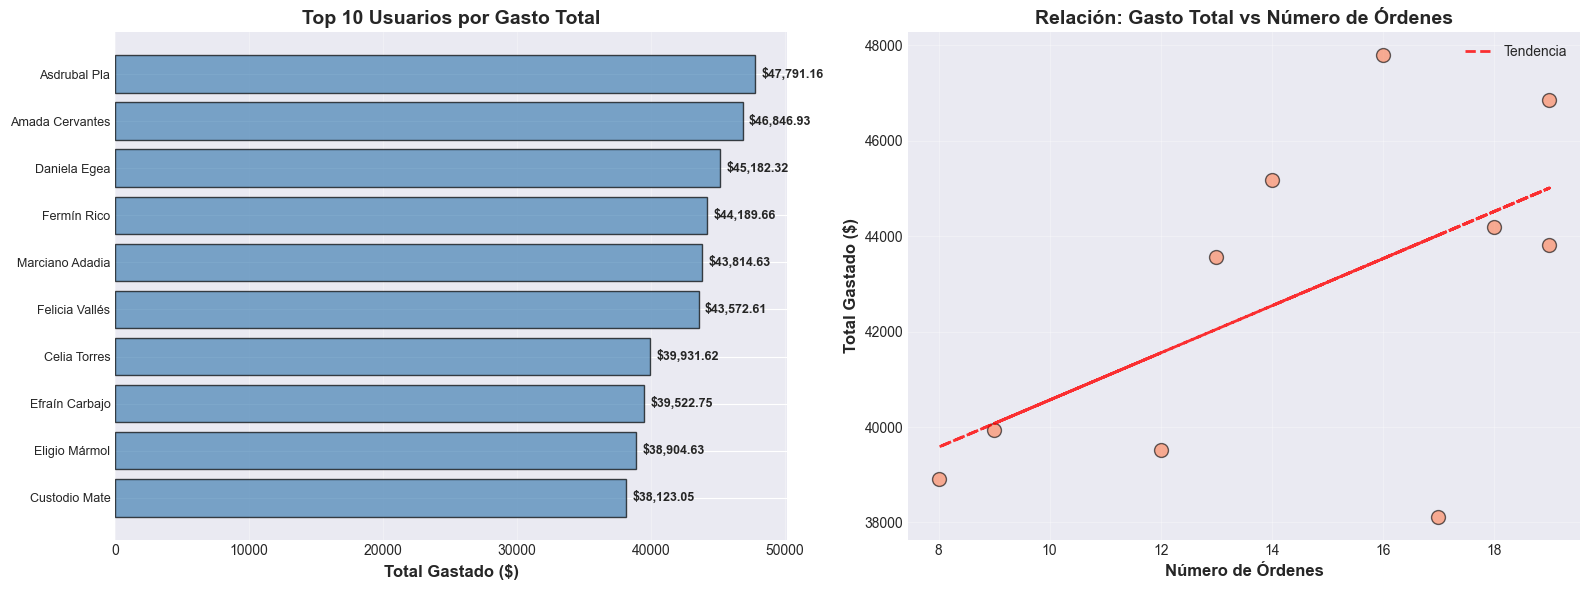


📊 Resumen:
   • Usuario que más ha gastado: Asdrubal Pla ($47,791.16)
   • Total de órdenes del top usuario: 16
   • Ticket promedio del top usuario: $2,986.95

📊 Estadísticas Generales:
   • Total de usuarios compradores: 1,000
   • Gasto total general: $12,163,801.78
   • Gasto promedio por usuario: $12,163.80
   • Gasto mediana: $10,619.26
   • Gasto mínimo: $87.52
   • Gasto máximo: $47,791.16


In [10]:
# Consulta SQL para obtener los usuarios que más han gastado
query_usuarios_mas_gastado = """
SELECT 
    u.usuario_id,
    u.nombre,
    u.apellido,
    u.email,
    COUNT(DISTINCT o.orden_id) AS total_ordenes,
    SUM(o.total) AS total_gastado,
    AVG(o.total) AS ticket_promedio,
    MIN(o.fecha_orden) AS primera_compra,
    MAX(o.fecha_orden) AS ultima_compra
FROM usuarios u
INNER JOIN ordenes o ON u.usuario_id = o.usuario_id
GROUP BY u.usuario_id, u.nombre, u.apellido, u.email
ORDER BY total_gastado DESC
LIMIT 10;
"""

df_usuarios_mas_gastado = pd.read_sql(query_usuarios_mas_gastado, engine)

print("=" * 100)
print("TOP 10 USUARIOS QUE MÁS HAN GASTADO")
print("=" * 100)
print(df_usuarios_mas_gastado.to_string(index=False))

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras horizontales - Top 10 usuarios por gasto total
top_10 = df_usuarios_mas_gastado.head(10)
ax1.barh(range(len(top_10)), top_10['total_gastado'], color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels([f"{row['nombre']} {row['apellido']}" for _, row in top_10.iterrows()], fontsize=9)
ax1.set_xlabel('Total Gastado ($)', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Usuarios por Gasto Total', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Agregar valores en las barras
for i, v in enumerate(top_10['total_gastado']):
    ax1.text(v + max(top_10['total_gastado']) * 0.01, i, 
             f'${v:,.2f}', va='center', fontweight='bold', fontsize=9)

# Gráfico de dispersión - Gasto total vs Número de órdenes
ax2.scatter(df_usuarios_mas_gastado['total_ordenes'], df_usuarios_mas_gastado['total_gastado'], 
           s=100, alpha=0.6, color='coral', edgecolors='black', linewidth=1)
ax2.set_xlabel('Número de Órdenes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Gastado ($)', fontsize=12, fontweight='bold')
ax2.set_title('Relación: Gasto Total vs Número de Órdenes', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

# Agregar línea de tendencia
z = np.polyfit(df_usuarios_mas_gastado['total_ordenes'], df_usuarios_mas_gastado['total_gastado'], 1)
p = np.poly1d(z)
ax2.plot(df_usuarios_mas_gastado['total_ordenes'], p(df_usuarios_mas_gastado['total_ordenes']), 
         "r--", alpha=0.8, linewidth=2, label='Tendencia')
ax2.legend()

plt.tight_layout()
plt.show()

# Estadísticas adicionales
query_estadisticas_gasto = """
SELECT 
    COUNT(DISTINCT usuario_id) AS total_usuarios_compradores,
    SUM(total) AS gasto_total_general,
    AVG(total) AS gasto_promedio_por_usuario,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY total) AS gasto_mediana,
    MIN(total) AS gasto_minimo,
    MAX(total) AS gasto_maximo
FROM (
    SELECT 
        usuario_id,
        SUM(total) AS total
    FROM ordenes
    GROUP BY usuario_id
) AS gastos_por_usuario;
"""

df_estadisticas_gasto = pd.read_sql(query_estadisticas_gasto, engine)

print(f"\n📊 Resumen:")
print(f"   • Usuario que más ha gastado: {df_usuarios_mas_gastado.iloc[0]['nombre']} {df_usuarios_mas_gastado.iloc[0]['apellido']} (${df_usuarios_mas_gastado.iloc[0]['total_gastado']:,.2f})")
print(f"   • Total de órdenes del top usuario: {int(df_usuarios_mas_gastado.iloc[0]['total_ordenes'])}")
print(f"   • Ticket promedio del top usuario: ${df_usuarios_mas_gastado.iloc[0]['ticket_promedio']:,.2f}")
print(f"\n📊 Estadísticas Generales:")
print(f"   • Total de usuarios compradores: {int(df_estadisticas_gasto['total_usuarios_compradores'].iloc[0]):,}")
print(f"   • Gasto total general: ${df_estadisticas_gasto['gasto_total_general'].iloc[0]:,.2f}")
print(f"   • Gasto promedio por usuario: ${df_estadisticas_gasto['gasto_promedio_por_usuario'].iloc[0]:,.2f}")
print(f"   • Gasto mediana: ${df_estadisticas_gasto['gasto_mediana'].iloc[0]:,.2f}")
print(f"   • Gasto mínimo: ${df_estadisticas_gasto['gasto_minimo'].iloc[0]:,.2f}")
print(f"   • Gasto máximo: ${df_estadisticas_gasto['gasto_maximo'].iloc[0]:,.2f}")


## 5. ¿Cuántos usuarios han dejado reseñas?


USUARIOS QUE HAN DEJADO RESEÑAS
Total de usuarios que han dejado reseñas: 998
Total de usuarios registrados: 1,000
Porcentaje de usuarios con reseñas: 99.80%

TOP 10 USUARIOS CON MÁS RESEÑAS
 usuario_id         nombre apellido                              email  total_resenas  calificacion_promedio      primera_resena       ultima_resena
        755        Macario  Iñiguez      macario.iniguez755@correo.com             15               2.666667 2024-07-03 10:22:06 2025-06-26 10:22:06
        528            Ana    Reyes            ana.reyes528@correo.com             14               2.571429 2024-07-04 10:22:06 2025-06-25 10:22:06
        269       Marisela Calderon    marisela.calderon269@correo.com             14               2.000000 2024-08-30 10:22:06 2025-05-08 10:22:06
        160         Fabián Vizcaíno      fabian.vizcaino160@correo.com             13               2.846154 2024-07-08 10:22:06 2025-05-18 10:22:06
        820          Celia   Torres         celia.torres820@corr

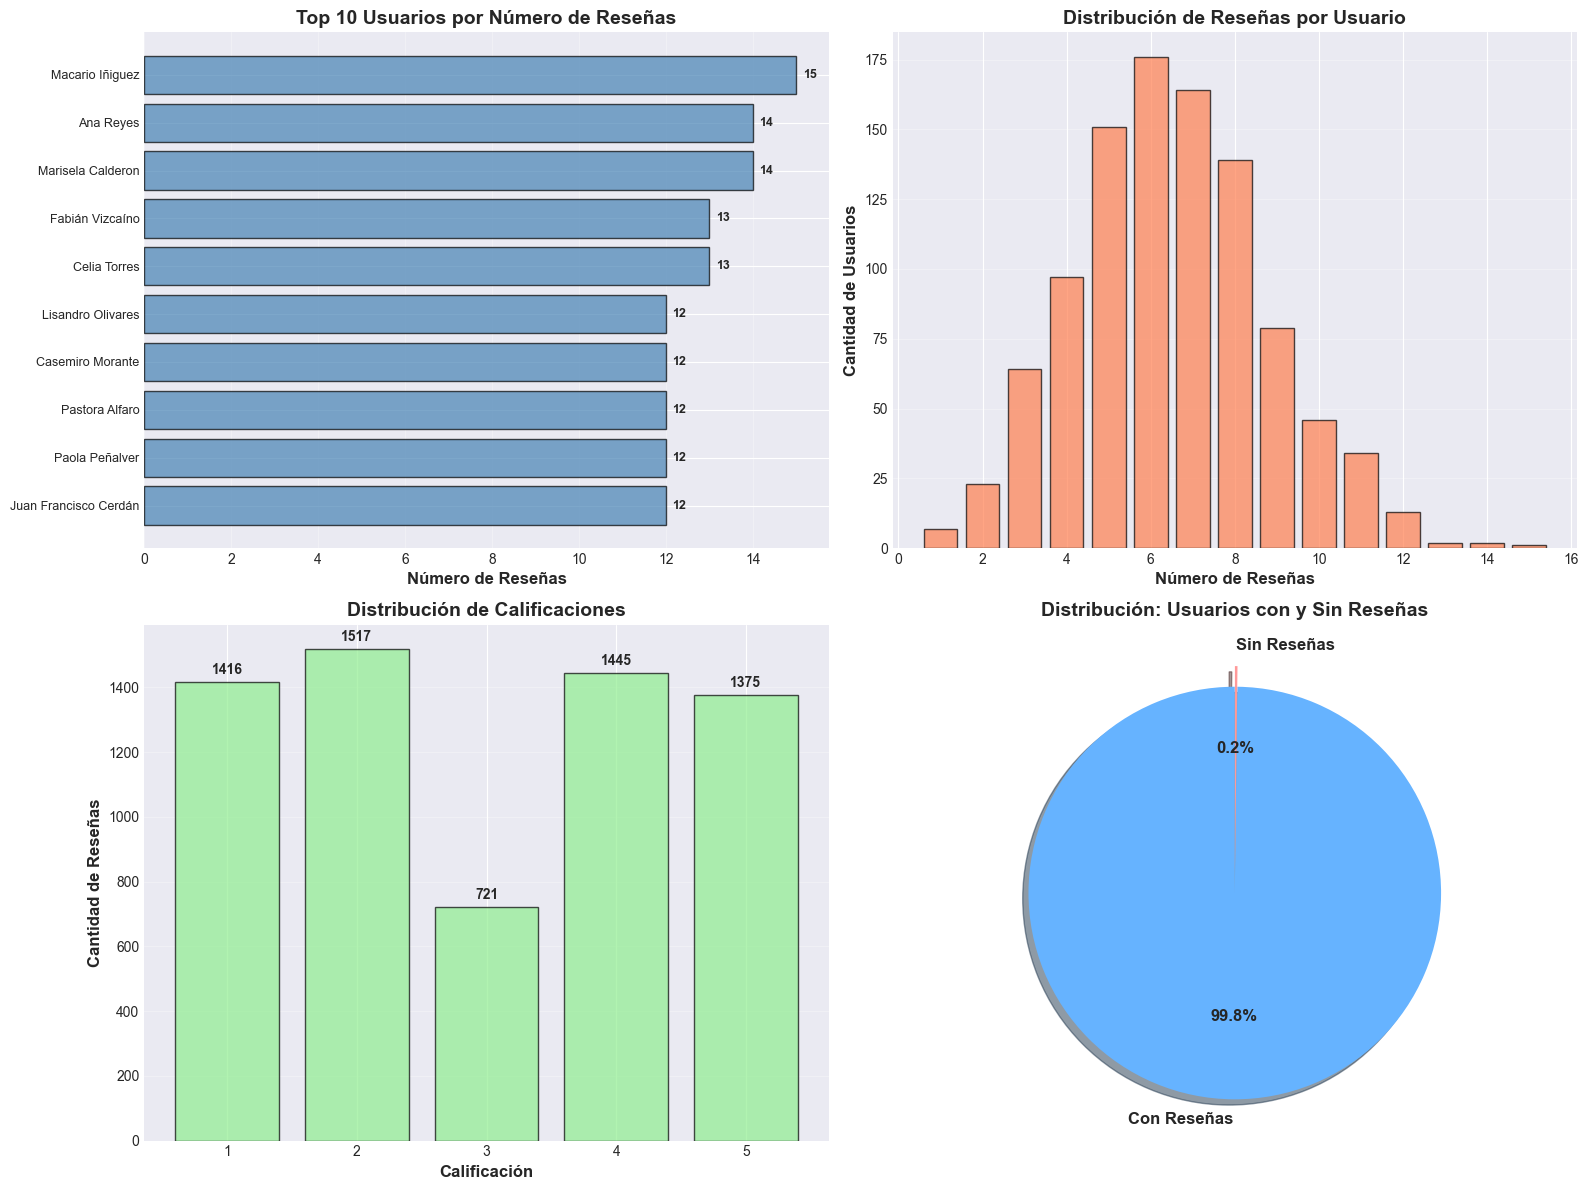


📊 Resumen:
   • Total de usuarios registrados: 1,000
   • Usuarios que han dejado reseñas: 998
   • Usuarios sin reseñas: 2
   • Porcentaje de usuarios con reseñas: 99.80%
   • Total de reseñas: 6,474
   • Promedio de reseñas por usuario (que ha reseñado): 6.49
   • Usuario con más reseñas: Macario Iñiguez (15 reseñas)
   • Calificación promedio del top usuario: 2.67


In [11]:
# Consulta SQL para obtener usuarios que han dejado reseñas
query_usuarios_con_resenas = """
SELECT 
    COUNT(DISTINCT usuario_id) AS total_usuarios_con_resenas
FROM resenas_productos;
"""

# Consulta para obtener estadísticas detalladas de reseñas por usuario
query_detalle_resenas_por_usuario = """
SELECT 
    u.usuario_id,
    u.nombre,
    u.apellido,
    u.email,
    COUNT(r.resena_id) AS total_resenas,
    AVG(r.calificacion) AS calificacion_promedio,
    MIN(r.fecha) AS primera_resena,
    MAX(r.fecha) AS ultima_resena
FROM usuarios u
INNER JOIN resenas_productos r ON u.usuario_id = r.usuario_id
GROUP BY u.usuario_id, u.nombre, u.apellido, u.email
ORDER BY total_resenas DESC, calificacion_promedio DESC
LIMIT 10;
"""

# Consulta para obtener distribución de reseñas
query_distribucion_resenas = """
SELECT 
    numero_resenas,
    COUNT(*) AS cantidad_usuarios
FROM (
    SELECT 
        usuario_id,
        COUNT(*) AS numero_resenas
    FROM resenas_productos
    GROUP BY usuario_id
) AS resenas_por_usuario
GROUP BY numero_resenas
ORDER BY numero_resenas;
"""

# Consulta para obtener estadísticas de calificaciones
query_estadisticas_calificaciones = """
SELECT 
    calificacion,
    COUNT(*) AS cantidad_resenas,
    COUNT(DISTINCT usuario_id) AS usuarios_unicos
FROM resenas_productos
WHERE calificacion IS NOT NULL
GROUP BY calificacion
ORDER BY calificacion DESC;
"""

df_usuarios_con_resenas = pd.read_sql(query_usuarios_con_resenas, engine)
df_detalle_resenas = pd.read_sql(query_detalle_resenas_por_usuario, engine)
df_distribucion_resenas = pd.read_sql(query_distribucion_resenas, engine)
df_estadisticas_calificaciones = pd.read_sql(query_estadisticas_calificaciones, engine)

# Consulta para obtener total de usuarios y comparación
query_total_usuarios = """
SELECT COUNT(*) AS total_usuarios FROM usuarios;
"""

df_total_usuarios = pd.read_sql(query_total_usuarios, engine)
total_usuarios = df_total_usuarios['total_usuarios'].iloc[0]
usuarios_con_resenas = df_usuarios_con_resenas['total_usuarios_con_resenas'].iloc[0]

print("=" * 100)
print("USUARIOS QUE HAN DEJADO RESEÑAS")
print("=" * 100)
print(f"Total de usuarios que han dejado reseñas: {usuarios_con_resenas:,}")
print(f"Total de usuarios registrados: {total_usuarios:,}")
print(f"Porcentaje de usuarios con reseñas: {(usuarios_con_resenas/total_usuarios*100):.2f}%")

print("\n" + "=" * 100)
print("TOP 10 USUARIOS CON MÁS RESEÑAS")
print("=" * 100)
print(df_detalle_resenas.to_string(index=False))

print("\n" + "=" * 100)
print("DISTRIBUCIÓN DE CALIFICACIONES")
print("=" * 100)
print(df_estadisticas_calificaciones.to_string(index=False))

# Visualización
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico de barras - Top 10 usuarios por número de reseñas
top_10_resenas = df_detalle_resenas.head(10)
ax1.barh(range(len(top_10_resenas)), top_10_resenas['total_resenas'], 
         color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_yticks(range(len(top_10_resenas)))
ax1.set_yticklabels([f"{row['nombre']} {row['apellido']}" for _, row in top_10_resenas.iterrows()], fontsize=9)
ax1.set_xlabel('Número de Reseñas', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Usuarios por Número de Reseñas', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Agregar valores en las barras
for i, v in enumerate(top_10_resenas['total_resenas']):
    ax1.text(v + max(top_10_resenas['total_resenas']) * 0.01, i, 
             str(int(v)), va='center', fontweight='bold', fontsize=9)

# Gráfico de barras - Distribución de número de reseñas por usuario
ax2.bar(df_distribucion_resenas['numero_resenas'], df_distribucion_resenas['cantidad_usuarios'], 
        color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Número de Reseñas', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cantidad de Usuarios', fontsize=12, fontweight='bold')
ax2.set_title('Distribución de Reseñas por Usuario', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Gráfico de barras - Distribución de calificaciones
ax3.bar(df_estadisticas_calificaciones['calificacion'], 
        df_estadisticas_calificaciones['cantidad_resenas'],
        color='lightgreen', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Calificación', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cantidad de Reseñas', fontsize=12, fontweight='bold')
ax3.set_title('Distribución de Calificaciones', fontsize=14, fontweight='bold')
ax3.set_xticks(df_estadisticas_calificaciones['calificacion'])
ax3.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(df_estadisticas_calificaciones['cantidad_resenas']):
    ax3.text(df_estadisticas_calificaciones['calificacion'].iloc[i], v + max(df_estadisticas_calificaciones['cantidad_resenas']) * 0.01, 
             str(int(v)), ha='center', va='bottom', fontweight='bold', fontsize=10)

# Gráfico de pastel - Usuarios con y sin reseñas
usuarios_sin_resenas = total_usuarios - usuarios_con_resenas
labels = ['Con Reseñas', 'Sin Reseñas']
sizes = [usuarios_con_resenas, usuarios_sin_resenas]
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.05)

ax4.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax4.set_title('Distribución: Usuarios con y Sin Reseñas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Consulta para obtener total de reseñas
query_total_resenas = """
SELECT COUNT(*) AS total_resenas FROM resenas_productos;
"""

df_total_resenas = pd.read_sql(query_total_resenas, engine)
total_resenas = df_total_resenas['total_resenas'].iloc[0]

print(f"\n📊 Resumen:")
print(f"   • Total de usuarios registrados: {total_usuarios:,}")
print(f"   • Usuarios que han dejado reseñas: {usuarios_con_resenas:,}")
print(f"   • Usuarios sin reseñas: {usuarios_sin_resenas:,}")
print(f"   • Porcentaje de usuarios con reseñas: {(usuarios_con_resenas/total_usuarios*100):.2f}%")
print(f"   • Total de reseñas: {total_resenas:,}")
if usuarios_con_resenas > 0:
    print(f"   • Promedio de reseñas por usuario (que ha reseñado): {(total_resenas/usuarios_con_resenas):.2f}")
else:
    print(f"   • Promedio de reseñas por usuario: 0")
if len(df_detalle_resenas) > 0:
    print(f"   • Usuario con más reseñas: {df_detalle_resenas.iloc[0]['nombre']} {df_detalle_resenas.iloc[0]['apellido']} ({int(df_detalle_resenas.iloc[0]['total_resenas'])} reseñas)")
    print(f"   • Calificación promedio del top usuario: {df_detalle_resenas.iloc[0]['calificacion_promedio']:.2f}")
